In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


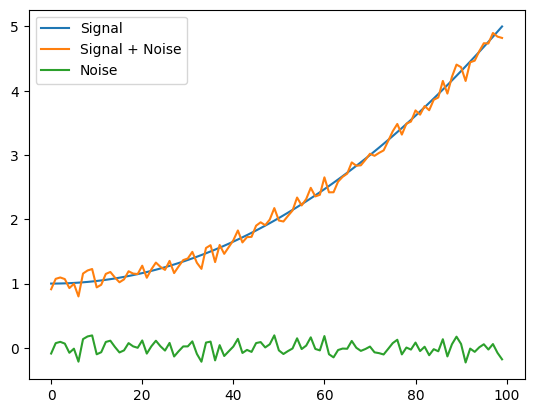

In [33]:
x1 = np.linspace(-1, 1, 100)
signal = x1**2 + 2*x1 + 2
noise = np.random.normal(0, 0.1, x1.shape)
y1 = signal + noise
plt.plot(signal, label='Signal')
plt.plot(y1, label='Signal + Noise')
plt.plot(noise, label='Noise')
plt.legend()
plt.show()


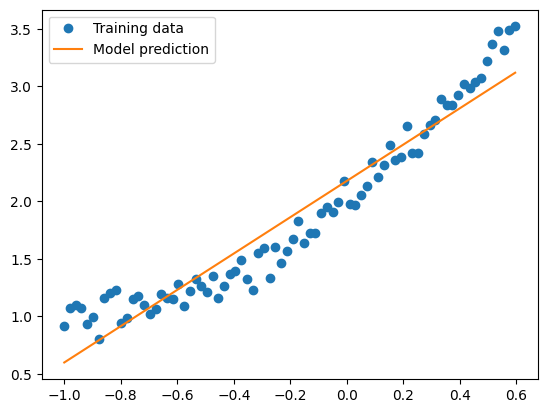

MSE for training data: 0.04676245727528676
R2 for training data: 0.9206324133852568
[2.1776773  1.57873767]
[0.59893963 0.63083332 0.66272701 0.6946207  0.72651439 0.75840808
 0.79030177 0.82219546 0.85408915 0.88598284 0.91787653 0.94977022
 0.98166391 1.0135576  1.04545129 1.07734498 1.10923867 1.14113237
 1.17302606 1.20491975 1.23681344 1.26870713 1.30060082 1.33249451
 1.3643882  1.39628189 1.42817558 1.46006927 1.49196296 1.52385665
 1.55575034 1.58764403 1.61953772 1.65143141 1.6833251  1.71521879
 1.74711248 1.77900617 1.81089986 1.84279355 1.87468724 1.90658093
 1.93847462 1.97036831 2.002262   2.0341557  2.06604939 2.09794308
 2.12983677 2.16173046 2.19362415 2.22551784 2.25741153 2.28930522
 2.32119891 2.3530926  2.38498629 2.41687998 2.44877367 2.48066736
 2.51256105 2.54445474 2.57634843 2.60824212 2.64013581 2.6720295
 2.70392319 2.73581688 2.76771057 2.79960426 2.83149795 2.86339164
 2.89528533 2.92717903 2.95907272 2.99096641 3.0228601  3.05475379
 3.08664748 3.11854117

In [34]:
x_train = x1[0:80]
y_train = y1[0:80]
#model with degree 2
degree = 2
X_train = np.column_stack([x_train**i for i in range(0, degree)])
#X_train = np.vander(x_train, N=degree, increasing=True)          #this is another way to create the Vandermonde matrix
model = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# another method for model calculation
predicted = X_train.dot(model)
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_train, predicted, label='Model prediction')
plt.legend()
plt.show()
mse_train = mean_squared_error(y_train, predicted)
r2_train = r2_score(y_train, predicted)
print('MSE for training data:', mse_train)
print('R2 for training data:', r2_train)
print(model)
print(predicted)
#print(X_train)
#print(y_train.shape)

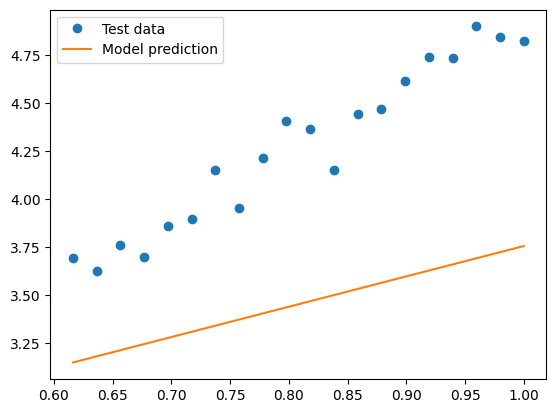

R2 on Test Data: -3.1781807753639013
Mean Squared Error on Test Data: 0.7205001051225268
model prediction on test data:
 [3.15043486 3.18232855 3.21422224 3.24611593 3.27800962 3.30990331
 3.341797   3.37369069 3.40558438 3.43747807 3.46937176 3.50126545
 3.53315914 3.56505283 3.59694652 3.62884021 3.6607339  3.69262759
 3.72452128 3.75641497]


In [35]:
# model perforamance on test data
x_test = x1[80:100]
y_test = y1[80:100]
X_test = np.column_stack([x_test**i for i in range(0, degree)])
predicted_test = X_test.dot(model)
plt.plot(x_test, y_test, 'o', label='Test data')
plt.plot(x_test, predicted_test, label='Model prediction')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, predicted_test)    
r_test = r2_score(y_test, predicted_test)
print('R2 on Test Data:', r_test)
print('Mean Squared Error on Test Data:', mse) 
print("model prediction on test data:\n", predicted_test)


### Another model evaluation for DOF = 5

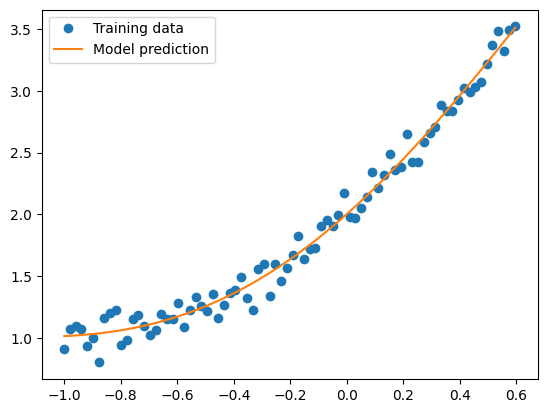

In [36]:
#model with degree 5
degree = 5
X_train2 = np.column_stack([x_train**i for i in range(0, degree)])
model = np.linalg.inv(X_train2.T.dot(X_train2)).dot(X_train2.T).dot(y_train)
predicted_train2 = X_train2.dot(model)
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_train, predicted_train2, label='Model prediction')  
plt.legend()
plt.show()

Mean Squared Error on Training Data (Degree 5): 0.04676245727528676
R2 on Training Data (Degree 5): 0.9852467711100021
Mean Squared Error on Test Data (Degree 5): 0.03524311523598585
R2 on Test Data (Degree 5): 0.7956251421810837


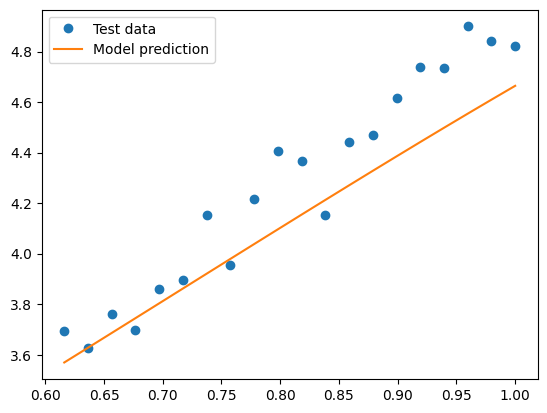

In [37]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, predicted)
# model performance on test data
x_test = x1[80:100]
y_test = y1[80:100]
X_test2 = np.column_stack([x_test**i for i in range(0, degree)])
predicted_test2 = X_test2.dot(model)
mse_test = mean_squared_error(y_test, predicted_test2)
print('Mean Squared Error on Training Data (Degree 5):', mse_train) 
print('R2 on Training Data (Degree 5):', r2_score(y_train, predicted_train2))
print('Mean Squared Error on Test Data (Degree 5):', mse_test)
print('R2 on Test Data (Degree 5):', r2_score(y_test, predicted_test2))
plt.plot(x_test, y_test, 'o', label='Test data')
plt.plot(x_test, predicted_test2, label='Model prediction')  
plt.legend()
plt.show()


#### CONCLUSION - Model is not relevent (Linear regression) for this Data
#### Lets use regularization here to solve the overfitting problem
